<a href="https://colab.research.google.com/github/AnastasiyaPunko/ML_2023/blob/main/Part_07_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports here
import pandas as pd
import numpy as np

#viz
import seaborn as sns
import matplotlib.pyplot as plt

# progress bar
from tqdm import tqdm

Открываем датасет и посмотрим на него

In [2]:
data = pd.read_csv('/content/winemag-data-130k-v2.csv')

In [3]:
print(data.shape)
data.head(5)

(113469, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Параметры в датасете:
- 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113469 entries, 0 to 113468
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             113469 non-null  int64  
 1   country                113417 non-null  object 
 2   description            113469 non-null  object 
 3   designation            80768 non-null   object 
 4   points                 113469 non-null  int64  
 5   price                  105546 non-null  float64
 6   province               113417 non-null  object 
 7   region_1               94872 non-null   object 
 8   region_2               43885 non-null   object 
 9   taster_name            90430 non-null   object 
 10  taster_twitter_handle  86115 non-null   object 
 11  title                  113469 non-null  object 
 12  variety                113467 non-null  object 
 13  winery                 113468 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
data.dropna(inplace=True)
data.shape
data.nunique()

Unnamed: 0               19421
country                      1
description              18007
designation               8704
points                      20
price                      141
province                     4
region_1                   166
region_2                    17
taster_name                 11
taster_twitter_handle       11
title                    17952
variety                    179
winery                    2702
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

for label in ['province', 'region_1', 'region_2', 'variety']:
  data[label] = LabelEncoder().fit_transform(data[label])

Векторизация текстовых колонок

In [7]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
description = data['description'].tolist()

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(description)]

model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

vectors = []
for x in documents:
    vec = list(model[x.tags][0])
    vectors.append(vec)

split_df = pd.DataFrame(vectors,
                        columns=['d1', 'd2', 'd3','d4','d5'])

result = data.join(split_df, how='left')

In [9]:
designation = data['designation'].tolist()

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(designation)]

model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

vectors = []
for x in documents:
    vec = list(model[x.tags][0])
    vectors.append(vec)

split_df = pd.DataFrame(vectors,
                        columns=['des1', 'des2', 'des3','des4','des5'])

result = result.join(split_df, how='left')

In [10]:
result

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,...,d1,d2,d3,d4,d5,des1,des2,des3,des4,des5
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,2,160,16,Paul Gregutt,...,-0.102906,0.243096,-1.007030,0.617615,-0.400916,-0.120542,-2.241161,-1.170878,1.180769,0.837920
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,0,82,6,Virginie Boone,...,-0.635710,-0.209101,-0.905721,0.860028,0.023422,-0.025905,-0.736865,-0.594006,-0.189453,0.543270
23,23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,0,93,1,Matt Kettmann,...,0.057297,-1.264760,-0.001671,0.238611,0.510516,0.226719,-0.689728,-0.687839,-0.334823,0.582549
25,25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,0,130,12,Virginie Boone,...,1.839144,0.140734,-3.986883,-5.465807,-0.219176,0.160844,-0.552149,-0.114875,-0.127659,0.444469
35,35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,2,67,16,Paul Gregutt,...,-1.777797,-1.220560,0.883344,-1.252118,-0.005697,2.301949,-1.741802,-0.463543,1.127879,0.713339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113462,113462,US,"Light in color, this wine brings pleasing, pur...",Reserve,89,22.0,2,160,16,Sean P. Sullivan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113463,113463,US,Produced from a mix of clones and vineyard sou...,Gravel Road,89,30.0,2,160,16,Paul Gregutt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113464,113464,US,"Strawberry fruit defines this open, broad-flav...",Freedom Stand Sure Vineyard,89,29.0,2,46,16,Paul Gregutt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113466,113466,US,"Consistent with the previous vintage, this com...",Orchard Block,89,70.0,2,39,16,Paul Gregutt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19421 entries, 4 to 113467
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             19421 non-null  int64  
 1   country                19421 non-null  object 
 2   description            19421 non-null  object 
 3   designation            19421 non-null  object 
 4   points                 19421 non-null  int64  
 5   price                  19421 non-null  float64
 6   province               19421 non-null  int64  
 7   region_1               19421 non-null  int64  
 8   region_2               19421 non-null  int64  
 9   taster_name            19421 non-null  object 
 10  taster_twitter_handle  19421 non-null  object 
 11  title                  19421 non-null  object 
 12  variety                19421 non-null  int64  
 13  winery                 19421 non-null  object 
 14  d1                     3317 non-null   float32
 15  d

In [12]:
# переопределим датасет, оставив только важное

data_sm = result[['points','price',
                'province', 'region_1',
                'region_2','variety',"d1","d2","d3","d4","d5","des1","des2","des3","des4","des5"]
              ]


data_sm.head(3)

,points,price,province,region_1,region_2,variety,d1,d2,d3,d4,d5,des1,des2,des3,des4,des5
4,87,65.0,2,160,16,109,-0.102906,0.243096,-1.007030,0.617615,-0.400916,-0.120542,-2.241161,-1.170878,1.180769,0.837920
10,87,19.0,0,82,6,19,-0.635710,-0.209101,-0.905721,0.860028,0.023422,-0.025905,-0.736865,-0.594006,-0.189453,0.543270
23,87,22.0,0,93,1,73,0.057297,-1.264760,-0.001671,0.238611,0.510516,0.226719,-0.689728,-0.687839,-0.334823,0.582549


In [13]:
data_sm.describe()

,points,price,province,region_1,region_2,variety,d1,d2,d3,d4,d5,des1,des2,des3,des4,des5
count,19421.000000,19421.000000,19421.000000,19421.000000,19421.000000,19421.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000
mean,89.493177,41.133258,1.102621,87.666341,6.714896,89.950003,-0.048157,-0.191464,0.010123,-0.026807,-0.355589,-0.027719,0.074143,0.082229,-0.087011,0.130726
std,2.802239,25.951280,1.326286,50.449707,5.465067,50.152699,0.212453,0.159280,0.238215,0.208700,0.141807,0.136515,0.146393,0.144900,0.133185,0.081059
min,80.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-2.280339,-2.158828,-3.986883,-5.465807,-2.245028,-0.397494,-2.241161,-1.170878,-1.815445,-0.145124
25%,88.000000,25.000000,0.000000,38.000000,2.000000,32.000000,-0.179895,-0.289824,-0.129785,-0.139012,-0.438217,-0.131720,-0.019792,-0.013230,-0.175869,0.076015
50%,90.000000,36.000000,0.000000,93.000000,3.000000,109.000000,-0.049746,-0.194113,-0.003986,-0.026106,-0.349015,-0.029146,0.072412,0.084994,-0.087811,0.128826
75%,92.000000,50.000000,3.000000,130.000000,12.000000,118.000000,0.084405,-0.091824,0.129212,0.093712,-0.263853,0.071472,0.166064,0.172444,0.003486,0.181247
max,99.000000,750.000000,3.000000,165.000000,16.000000,178.000000,1.839144,0.737501,3.734110,0.989266,1.083471,2.301949,1.996540,2.962604,1.180769,0.837920


In [14]:
data_sm.skew() # можно посмотреть вот так сразу все столбцы

points     -0.225766
price       4.186702
province    0.477712
region_1   -0.034856
region_2    0.468612
variety    -0.206327
d1         -0.232446
d2         -0.698338
d3          1.273843
d4         -5.660143
d5         -0.796280
des1        2.612300
des2       -0.768527
des3        2.928116
des4       -0.373113
des5        0.575609
dtype: float64

А можно сделать гистограммы для значений каждого столбца отдельно (каждый столбец = параметр в нашей будущей модели). Таким образом увидим распределение каждого и параметров. Это может быть полезно, так как:
* мы увидим распределение каждого параметра отдельно (выявим сдвиги, если они есть)
* определим выбросы

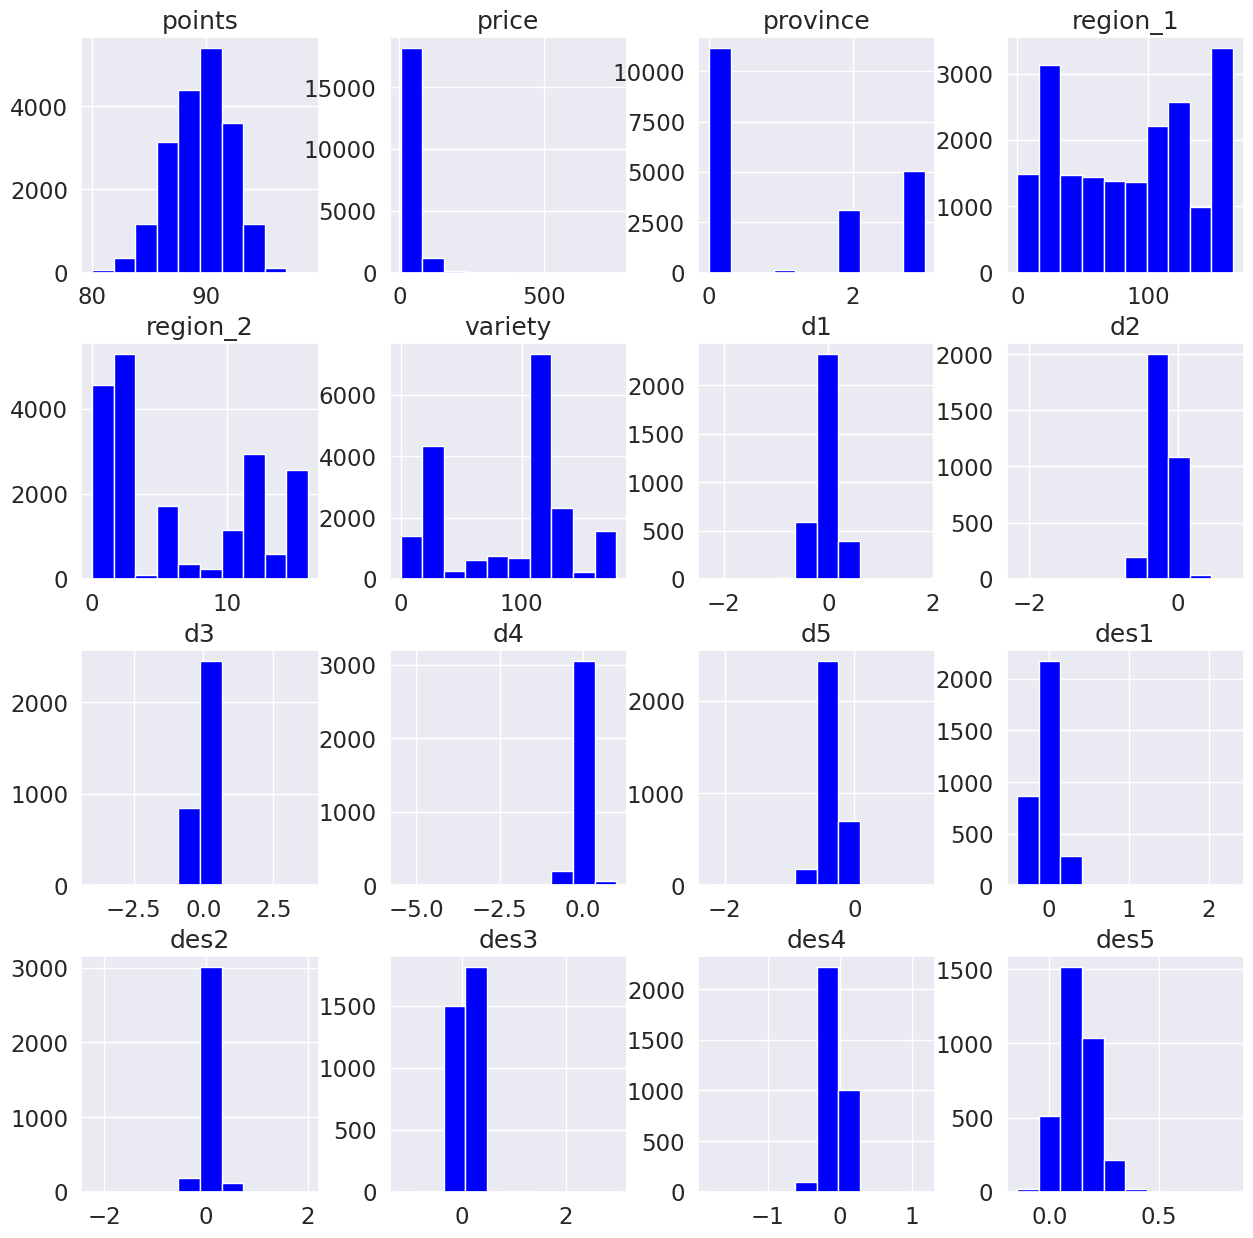

In [15]:
sns.set(font_scale=1.5, rc={'figure.figsize':(15,15)})

ax=data_sm.hist(color='blue' )


# обратите внимание на начения x и y 

## Подготовка данных 

В качестве основного алгоритма мы будем использовать K-means. Так как он использует дистанцию как основную метрику для определения данных в кластеры, давайте нормируем значения параметров, чтобы они определялись на едином промежутке

In [16]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_scaled=data_sm.copy()
data_scaled[data_scaled.columns]=std_scaler.fit_transform(data_scaled)

In [17]:
data_scaled.head(3)

,points,price,province,region_1,region_2,variety,d1,d2,d3,d4,d5,des1,des2,des3,des4,des5
4,-0.889732,0.919699,0.676628,1.433815,1.699035,0.379850,-0.257734,2.728691,-4.270548,3.088255,-0.319691,-0.680048,-15.818022,-8.649392,9.520348,8.725784
10,-0.889732,-0.852899,-0.831381,-0.112320,-0.130815,-1.414716,-2.765979,-0.110743,-3.845198,4.249966,2.673127,0.013295,-5.540763,-4.667613,-0.769287,5.090214
23,-0.889732,-0.737295,-0.831381,0.105725,-1.045741,-0.337977,0.496438,-6.739436,-0.049519,1.271959,6.108560,1.864083,-5.218726,-5.315280,-1.860932,5.574868


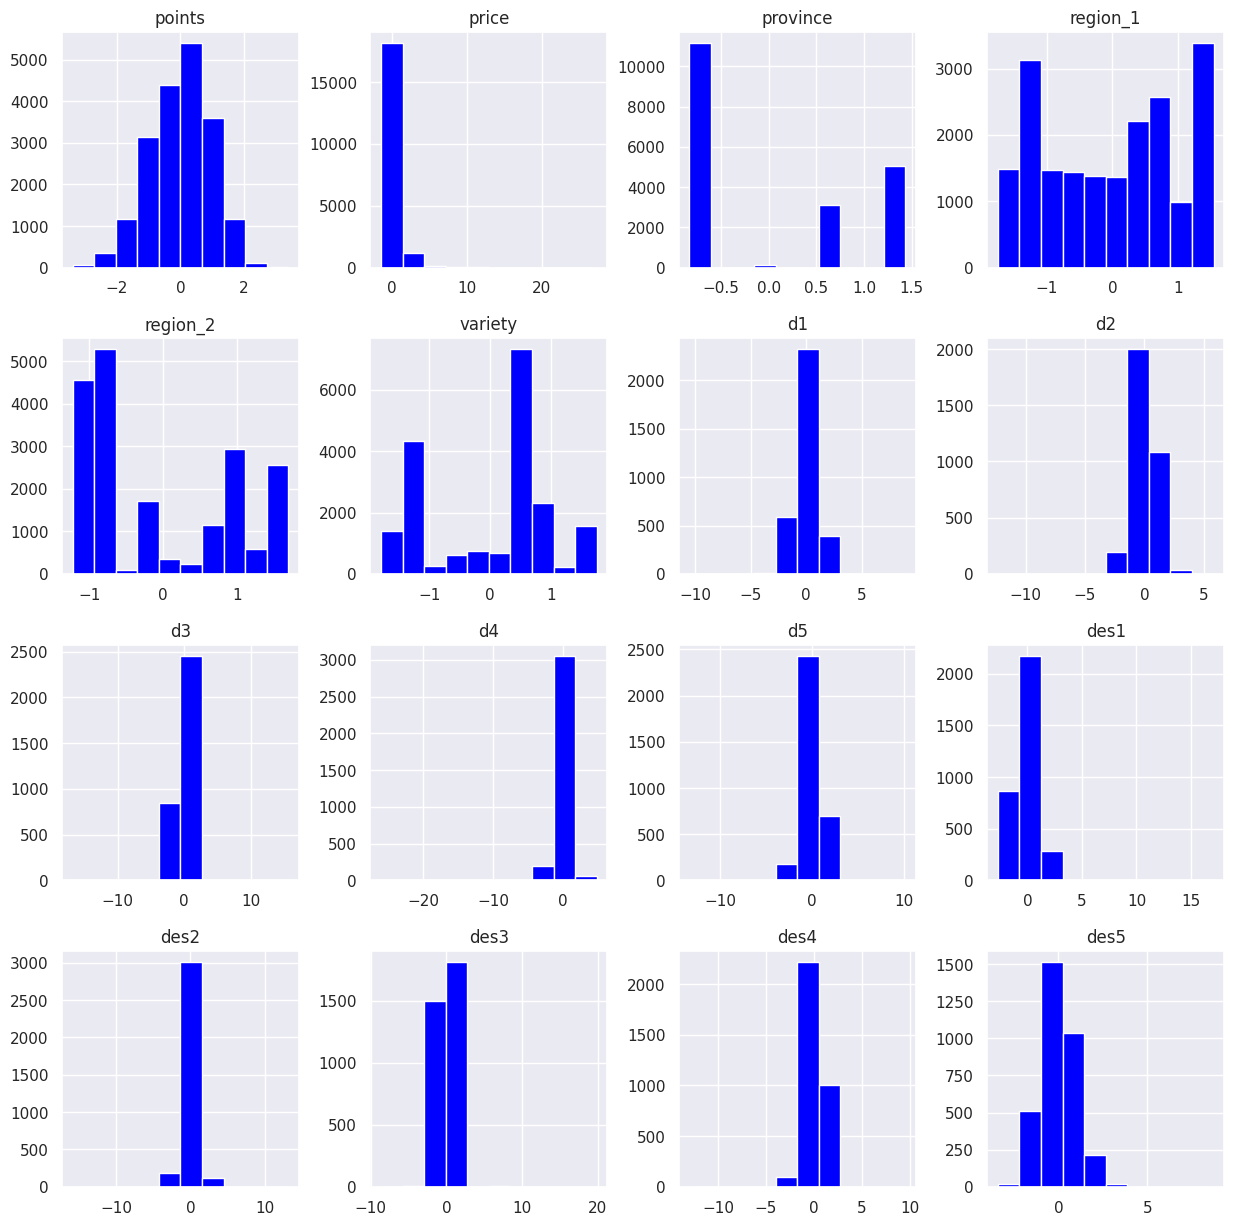

In [18]:
# отрисуем распределения параметров еще раз: формы не изменились, а шкалы изменились (стали едиными для всех параметров) 

sns.set(font_scale=1, rc={'figure.figsize':(15,15)})

ax=data_scaled.hist(color='blue')

In [19]:
display(data_scaled.min())
# data_scaled.max().max()

points      -3.387799
price       -1.430920
province    -0.831381
region_1    -1.737742
region_2    -1.228726
variety     -1.793569
d1         -10.508275
d2         -12.353462
d3         -16.781545
d4         -26.065234
d5         -13.326052
des1        -2.709072
des2       -15.818022
des3        -8.649392
des4       -12.979615
des5        -3.403594
dtype: float64

A еще можем нарисовать тепловую карту корреляций параметров:

<Axes: >

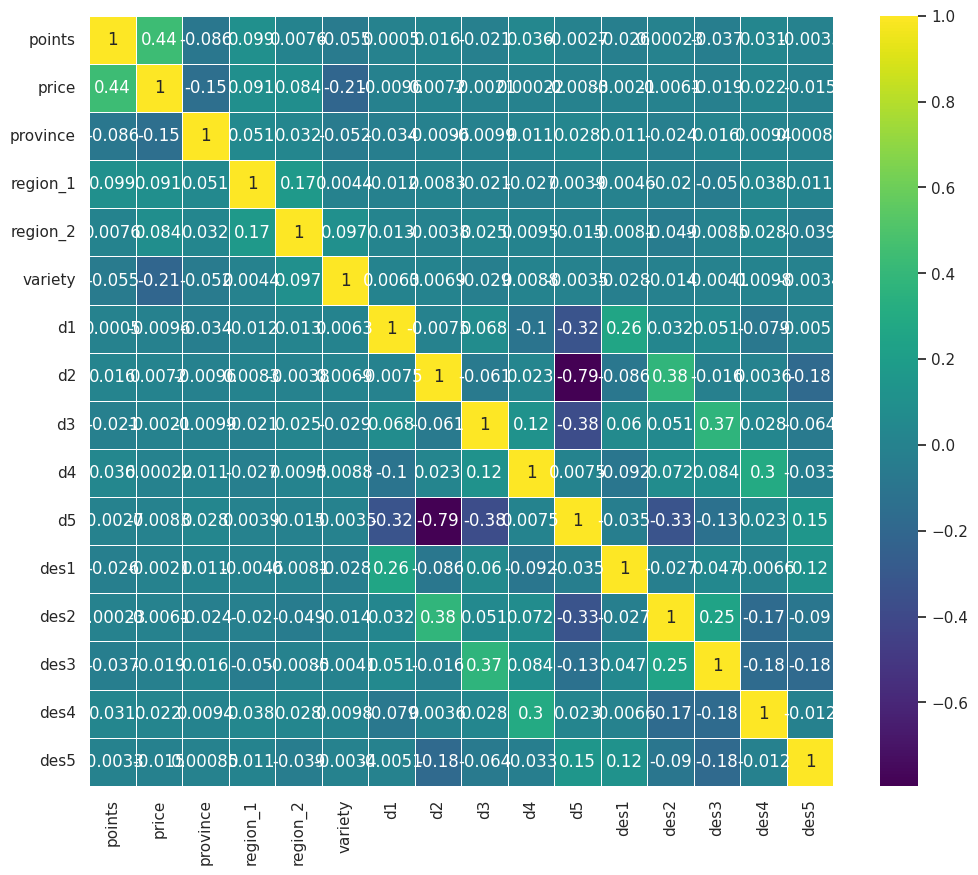

In [20]:
corr = data_scaled.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr, linewidths=.5, cmap='viridis', annot=True)

**Мы имеем дело с многомерным датасетом:** каждый параметр обраует свое измерение, всего у нас 13-мерное пространство! Кластеры в таком пространстве эффективно собрать не получится, давайте уменьшим пространство: найдем две компоненты, вдоль которых существует наибольшая дисперсия данных. Такой метод называется методом главных компонент или PCA [Principle Component Analysis] (объяснение [полегче](https://habr.com/ru/post/304214/) и [посложнее](http://machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82))

In [21]:
data_scaled.isna().any()

points      False
price       False
province    False
region_1    False
region_2    False
variety     False
d1           True
d2           True
d3           True
d4           True
d5           True
des1         True
des2         True
des3         True
des4         True
des5         True
dtype: bool

In [22]:
data = data_scaled.dropna()
data.shape

(3317, 16)

In [23]:
from sklearn.decomposition import PCA
pca_2 = PCA(2) # задали количество компонент

pca_2_result = pca_2.fit_transform(data) 

pca_2_result.shape # массив длиной в кол-во строк датасета и шириной по числу компонент

(3317, 2)

Давайте это визуализируем

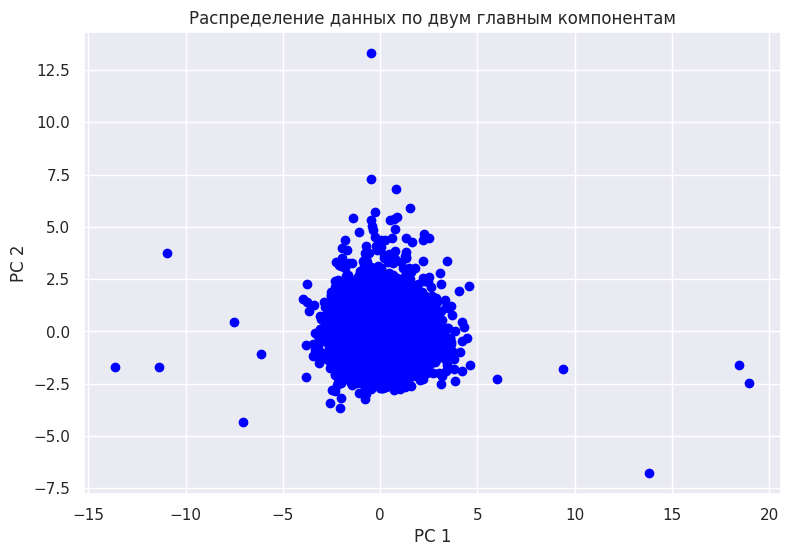

In [24]:
sns.set(rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='blue') # 0 и 1 - индексы колонок
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.title('Распределение данных по двум главным компонентам')
plt.show()

# Кластеризация



##K-means


Сначала посчитаем *инерцию* (это тоже метрика, она считается как сумма квадратов ошибок для каждого кластера). Чем ниже значения инерции, тем более "плотные" получились кластеры, следовательно, тем лучше прошла кластеризация 

In [32]:
import sklearn.cluster as cluster

inertia = [] # сюда будем сохранять значения
for i in tqdm(range(2,16)): # значения интервала - число кластеров (можно изменять) 
    kmeans = cluster.KMeans( n_clusters=i, # инициализируем модель
               init='k-means++', # метод, как разбросать центры среди данных
               n_init=15, # сколько раз будем переопределять центры (в результате выберем самый успешный)
               max_iter=500, # количество итераций а один проход алгоритма
               random_state=17) # сколько раз датасет перемешан перед кластеризацией
    
    
    kmeans.fit(pca_2_result) # обучаем модель
    inertia.append(kmeans.inertia_) # добавляем значения инерции для каждого числа кластеров
    
print(inertia)

100%|██████████| 14/14 [00:01<00:00,  8.12it/s]

[8908.417719882358, 6608.2171272023725, 5523.048927886155, 4803.0731860450605, 4059.237625134627, 3516.8642880366533, 3132.916939618793, 2792.370416077865, 2497.0993155903698, 2261.7156797246116, 2044.6158363903132, 1892.697704323968, 1761.0926026350999, 1646.462976400059]


Следующая метрика -- силуэты. Чем больше значение, тем лучше прошла кластеризация

Силуэты считаются как отношение среднего внутри кластера $a$ и среднего к ближайшему кластеру $b$ для каждой точки. $Silhouette Coefficient = (b - a) / max(a, b)$

In [31]:
from sklearn.metrics import silhouette_score

# все как в предыдущей ячейке, только силуэт-скоры сохраняем как значения в словаре
silhouette = {}
for i in tqdm(range(2,16)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_2_result)
    
    silhouette[i] = silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean')

print(silhouette)

100%|██████████| 14/14 [00:14<00:00,  1.05s/it]

{2: 0.32938997607805065, 3: 0.33126810435294596, 4: 0.30712058435934425, 5: 0.3063716645261002, 6: 0.3125269701553082, 7: 0.31801218897701927, 8: 0.31145997194206676, 9: 0.3148574700541357, 10: 0.3172305051545013, 11: 0.31669698715891426, 12: 0.3242262769490449, 13: 0.3236081992205497, 14: 0.32123009485051846, 15: 0.3228466758749937}


Давайте это визуализируем:

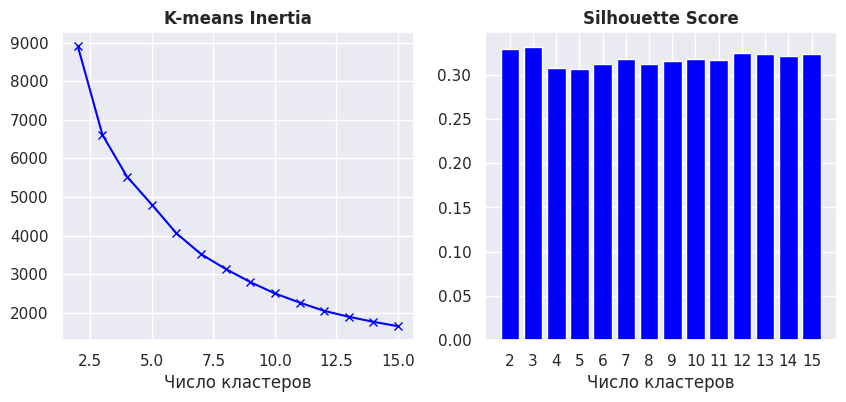

In [33]:
sns.set(font_scale=1, rc={'figure.figsize':(10,4)})

plt.subplot(1, 2, 1) # аргументы: nrows, ncols, index

plt.plot(range(2,len(inertia)+2), inertia, marker='x',color='blue') 
# первый параметр = x (число шагов= числу кластеров), второй = y (инерция)

plt.xlabel('Число кластеров')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2) # аргументы: nrows, ncols, index

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'blue')
plt.xticks(range(len(silhouette)), list(silhouette.keys())) # отметки на шкале
plt.grid(True)
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Число кластеров')


plt.show()

**Попробуем взять количество кластеров равное 3**

In [29]:
kmeans = cluster.KMeans(n_clusters=3,random_state=17,init='k-means++')

kmeans_labels = kmeans.fit_predict(pca_2_result)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids = kmeans.cluster_centers_

display(pd.Series(kmeans_labels).value_counts()) # кол-во вин по кластерам
kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2    1194
0    1148
1     975
dtype: int64

array([2, 2, 2, ..., 0, 2, 2], dtype=int32)

PCA Clusters Visualization

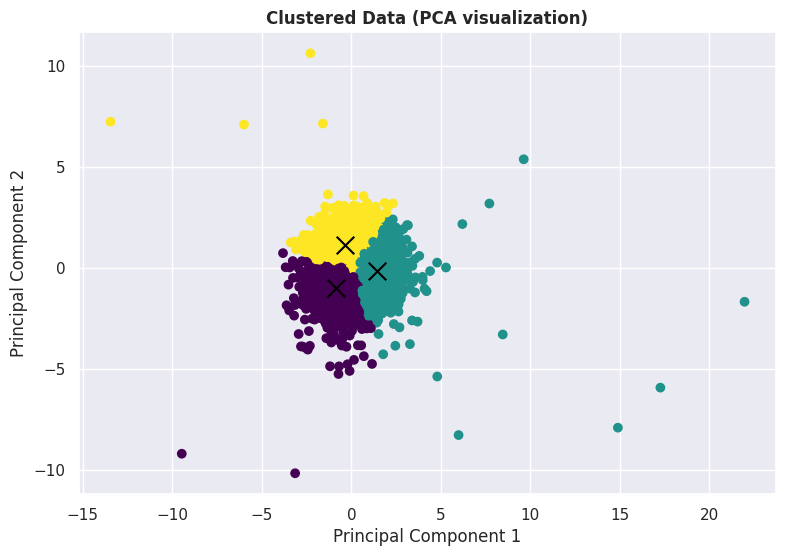

In [32]:
sns.set( rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

Осталось посчитать метрики:

In [33]:
# инерция: определяется от 0 и выше (чем ниже тем лучше)
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

print("Inertia score: %0.1f" % kmeans.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean'))

Inertia score: 6455.9 
Silhouette score: 0.3


У кластеров нет четких границ

**Попробуем взять количество кластеров равное 15**

In [34]:
kmeans = cluster.KMeans(n_clusters=15,random_state=17,init='k-means++')

kmeans_labels = kmeans.fit_predict(pca_2_result)
# вычисляем центры кластеров и предугадываем номер кластера для каждого семпла данных

centroids = kmeans.cluster_centers_

display(pd.Series(kmeans_labels).value_counts()) # кол-во вин по кластерам
kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10    448
1     444
9     379
6     356
0     249
8     243
2     239
4     233
13    228
3     203
12    159
14     83
7      45
11      5
5       3
dtype: int64

array([11, 11, 11, ...,  2,  3,  6], dtype=int32)

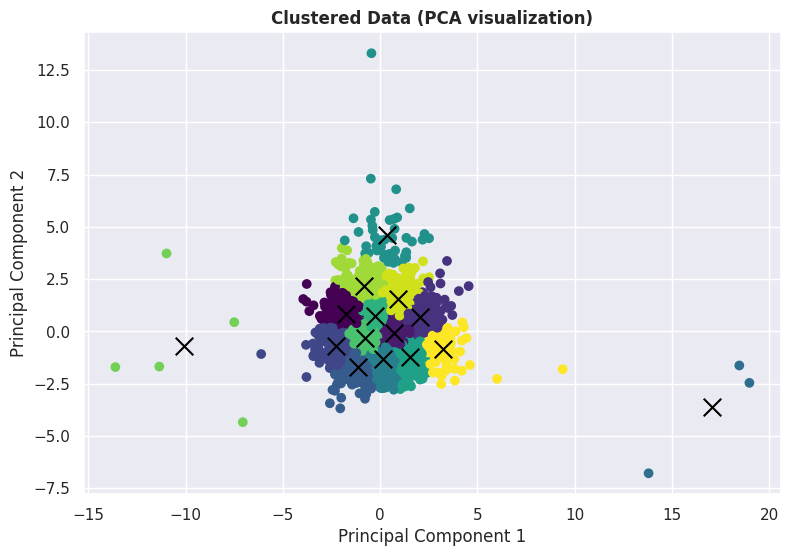

In [35]:
sns.set( rc={'figure.figsize':(9,6)},font_scale=1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=160, color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# добавить легенду

plt.title('Clustered Data (PCA visualization)',fontweight='bold')

plt.show()

In [36]:
# инерция: определяется от 0 и выше (чем ниже тем лучше)
# силуэты: определяется на промежутке [-1;1] (чем выше тем лучше)

print("Inertia score: %0.1f" % kmeans.inertia_,
     "\nSilhouette score: %0.1f" % silhouette_score(pca_2_result, kmeans.labels_, metric='euclidean'))

Inertia score: 1646.5 
Silhouette score: 0.3


При большем количестве кластеров инерция становится ниже, но все равно у кластеров нет границ

##DBSCAN 

In [37]:
from sklearn.cluster import  DBSCAN

from sklearn import metrics

from sklearn.datasets import make_blobs


DBSCAN похож на MS и Spectral Clustering. К данным применяется некоторое преобразование, чтобы определить близкие объекты и ещё дальше откинуть выбросы. Потом выбирается какой-то объект, и в его окрестностях ищутся другие объекты. Если находятся, то эти объекты сливаются в один кластер и так далее до устойчивости. Если количество объектов в кластере меньше порога, то объекты считаются выбросами.

DBSCAN сам находит количество кластеров и умеет отфильтровывать выбросы. Параметрами можно настраивать объём окрестности и таким образом влиять на кластеры.


In [60]:
# eps - задает максимальную для объединения дистанцию между объектами == размер окрестности
# min_samples - минимальное количество объектов в классе

X = pca_2_result
cluster = DBSCAN(min_samples=2, eps=0.5) 
cluster.fit(X)

DBSCAN(min_samples=2)

Метки кластеров для всех объектов в датасете лежат в cluster.labels_

In [61]:
cluster.labels_

array([-1, -1, -1, ...,  0,  0,  0])

Посмотрим сколько кластеров образовалось

In [62]:
len(set(cluster.labels_))

7

In [63]:
data['Cluster'] = cluster.labels_
data.groupby(['Cluster']).mean()

<ipython-input-63-0d8425ac49ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = cluster.labels_


,points,price,province,region_1,region_2,variety,d1,d2,d3,d4,d5,des1,des2,des3,des4,des5
Cluster,,,,,,,,,,,,,,,,
-1,-0.162781,2.242725,-0.468342,-0.049182,-0.035934,-0.485677,0.414201,0.157653,0.672203,-1.325746,-0.591581,1.958729,-0.303847,1.291794,-0.562842,1.096757
0,0.028407,0.026532,-0.027907,-0.004994,-0.027178,-0.009487,-0.002880,-0.002559,-0.006961,0.010671,0.006688,-0.015956,0.000933,-0.012493,0.005623,-0.009781
1,-0.532865,-0.024402,0.299626,-0.191608,0.143662,-0.906256,-0.453473,1.701139,2.172498,0.998886,-2.457356,-0.159008,2.269119,1.883440,-0.524744,-0.117546
2,1.251468,0.582520,-0.265878,0.868881,-0.451039,-0.417735,-1.790520,-1.865527,-0.665869,0.256703,2.521679,-0.607668,-1.190778,-0.083690,0.212290,0.931624
3,1.608335,4.676835,-0.831381,-0.112320,-0.130815,-1.414716,-0.444987,0.853885,-0.100833,0.109501,-0.684197,0.102172,0.932328,1.099887,-0.200155,-0.251870
4,0.775646,5.736541,-0.831381,0.297340,-0.130815,-1.414716,1.334761,0.970504,0.569975,-1.071726,-1.819532,0.353664,0.318529,0.215475,-0.898561,-0.415844
5,1.608335,1.516987,-0.831381,0.631014,-0.588278,-1.474535,1.603928,1.784511,0.736073,0.398341,-2.144731,0.443262,1.274750,-0.109084,0.032487,0.349835


Давайте попробуем посчитать метрики 

In [64]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X,cluster.labels_ ))

Silhouette Coefficient: 0.225


В DBSCAN значение метрики тоже достаточно низкое.

То есть кластеризация в обоих случаях получилась не очень хорошей.